In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
# import some data to play with
data = pd.read_csv('Fraud_check.csv')

In [83]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [50]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int32
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int32(1), int64(5)
memory usage: 25.9 KB


In [84]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int32
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int32(1), int64(5)
memory usage: 25.9 KB


In [53]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
data[data['Taxable.Income']<=30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


In [7]:
data2 = pd.cut(data['Taxable.Income'],bins=[10003,30000,99619],labels=['low','high'])

In [8]:
data2

0      high
1      high
2      high
3      high
4      high
       ... 
595    high
596    high
597    high
598    high
599    high
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['low' < 'high']

In [11]:
data['Taxable.Income']=data2
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,high,50047,10,YES
1,YES,Divorced,high,134075,18,YES
2,NO,Married,high,160205,30,YES
3,YES,Single,high,193264,15,YES
4,NO,Married,high,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,high,39492,7,YES
596,YES,Divorced,high,55369,2,YES
597,NO,Divorced,high,154058,0,YES
598,YES,Married,high,180083,17,NO


In [12]:
data['Taxable.Income']

0      high
1      high
2      high
3      high
4      high
       ... 
595    high
596    high
597    high
598    high
599    high
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['low' < 'high']

In [91]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,high,50047,10,YES
1,YES,Divorced,high,134075,18,YES
2,NO,Married,high,160205,30,YES
3,YES,Single,high,193264,15,YES
4,NO,Married,high,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,high,39492,7,YES
596,YES,Divorced,high,55369,2,YES
597,NO,Divorced,high,154058,0,YES
598,YES,Married,high,180083,17,NO


In [13]:
label_encoder=preprocessing.LabelEncoder()

data['Taxable.Income']=label_encoder.fit_transform(data['Taxable.Income'])

In [93]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES
2,NO,Married,0,160205,30,YES
3,YES,Single,0,193264,15,YES
4,NO,Married,0,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,0,39492,7,YES
596,YES,Divorced,0,55369,2,YES
597,NO,Divorced,0,154058,0,YES
598,YES,Married,0,180083,17,NO


In [ ]:
#Complete df dataset

In [15]:

label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])
data['Urban']= label_encoder.fit_transform(data['Urban'])


In [95]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [16]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [17]:
data.dropna(inplace=True)

In [18]:
x=pd.concat([data.iloc[:,0:2],data.iloc[:,3:6]],axis=1)
y=data['Taxable.Income']

In [19]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [22]:
data['Taxable.Income'].unique()

array([0, 1, 2])

In [102]:
data['Taxable.Income'].value_counts()

0    476
1    123
2      1
Name: Taxable.Income, dtype: int64

In [23]:
colnames = list(data.columns) 
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [24]:
 #Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [25]:
#Building Decision Tree Classifier using Entropy Criteria

In [26]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)  
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

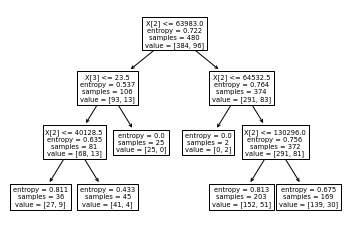

In [27]:
#PLot the decision tree
tree.plot_tree(model);

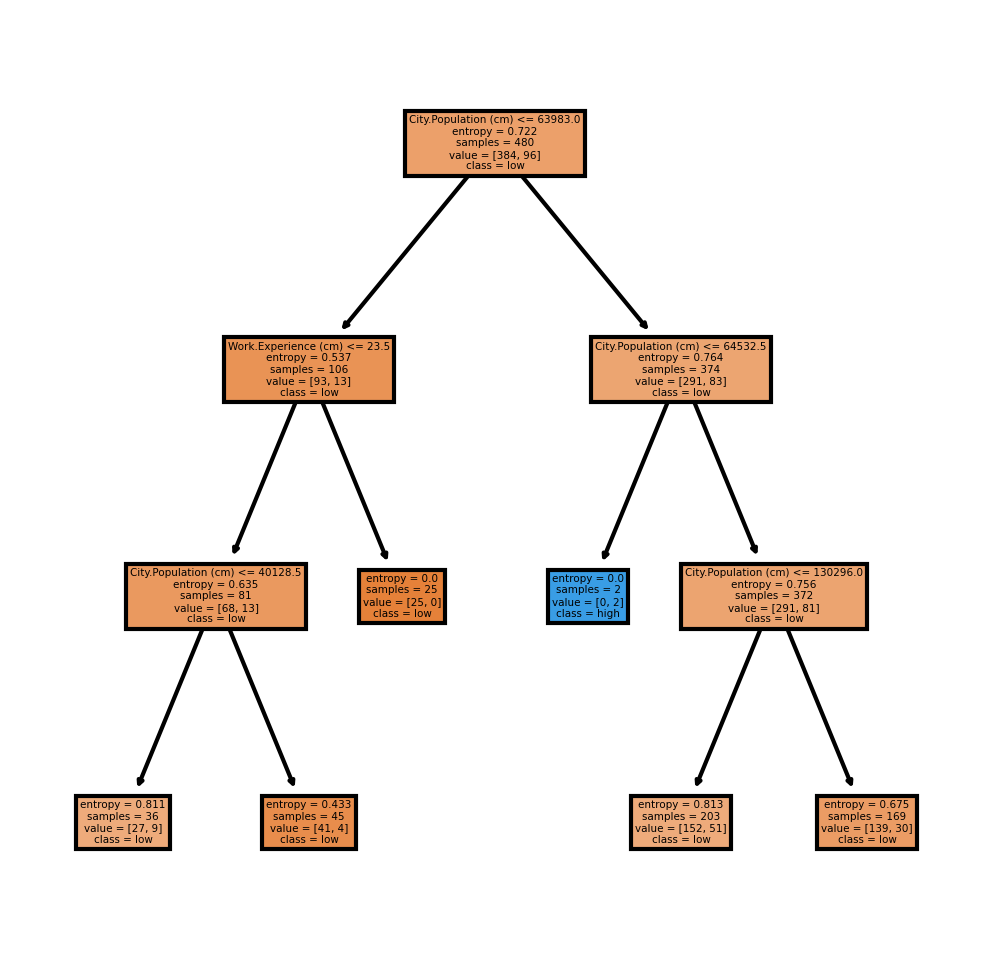

In [28]:
fn=['Undergrad (cm)','Marital.Status (cm)','City.Population (cm)','Work.Experience (cm)','Urban (cm)']
cn=['low', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [29]:
text = tree.export_text(model,max_depth=3)  
print(text)

|--- feature_2 <= 63983.00
|   |--- feature_3 <= 23.50
|   |   |--- feature_2 <= 40128.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  40128.50
|   |   |   |--- class: 0
|   |--- feature_3 >  23.50
|   |   |--- class: 0
|--- feature_2 >  63983.00
|   |--- feature_2 <= 64532.50
|   |   |--- class: 1
|   |--- feature_2 >  64532.50
|   |   |--- feature_2 <= 130296.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  130296.00
|   |   |   |--- class: 0



In [30]:
model.feature_importances_

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [31]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

City.Population (cm)    0.710037
Work.Experience (cm)    0.289963
Undergrad (cm)          0.000000
Marital.Status (cm)     0.000000
Urban (cm)              0.000000
dtype: float64

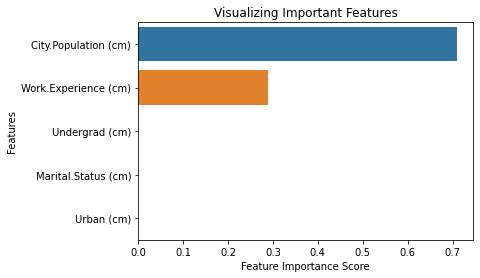

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [33]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    120
dtype: int64

In [34]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0
Taxable.Income,
0,92
1,27
2,1


In [36]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

In [37]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [38]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [39]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667

In [41]:
model.feature_importances_

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [42]:
#Decision Tree Regression Example

In [43]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [45]:
array = data.values
X = array[:,0:3] 
y = array[:,3]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [48]:
#Find the testing accuracy
model.score(X_test,y_test)

-0.10175268393977577

In [49]:
#Find the training accuracy
model.score(X_train, y_train)

0.055252621782573175